In [4]:
#import libraries
import pandas as pd
from collections import Counter
import numpy as np
import scipy


In [6]:
# 120
print("hello")

hello


In [7]:
Goal4 = pd.read_csv('Goal4.csv')

/opt/tljh/user/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (1,9,16,17,19,21,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
Goal4.columns

Index(['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription',
       'GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail',
       'TimeCoverage', 'UpperBound', 'LowerBound', 'BasePeriod', 'Source',
       'GeoInfoUrl', 'FootNote', 'Age', 'Education level', 'Location',
       'Nature', 'Quantile', 'Reporting Type', 'Sex', 'Type of skill', 'Units',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51'],
      dtype='object')

In [9]:
#Country of focus
countries = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bhutan','Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo','Congo, Democratic Republic', 'Costa Rica', 'Croatia', "Côte d'Ivoire", 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia (Federated States of)','Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Sri Lanka', 'Sudan', 'Suriname', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Republic of Tanzania', 'Uruguay', 'Uzbekistan', 'Vanuatu','Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

In [10]:
for i,j in enumerate(countries):
    print(i,j)

0 Afghanistan
1 Albania
2 Algeria
3 Angola
4 Antigua and Barbuda
5 Argentina
6 Armenia
7 Azerbaijan
8 Bangladesh
9 Belarus
10 Belize
11 Benin
12 Bhutan
13 Bolivia
14 Bosnia and Herzegovina
15 Botswana
16 Brazil
17 Bulgaria
18 Burkina Faso
19 Burundi
20 Cabo Verde
21 Cambodia
22 Cameroon
23 Central African Republic
24 Chad
25 Chile
26 China
27 Colombia
28 Comoros
29 Congo
30 Congo, Democratic Republic
31 Costa Rica
32 Croatia
33 Côte d'Ivoire
34 Djibouti
35 Dominica
36 Dominican Republic
37 Ecuador
38 Egypt
39 El Salvador
40 Equatorial Guinea
41 Eritrea
42 Eswatini
43 Ethiopia
44 Fiji
45 Gabon
46 Gambia
47 Georgia
48 Ghana
49 Grenada
50 Guatemala
51 Guinea
52 Guinea-Bissau
53 Guyana
54 Haiti
55 Honduras
56 India
57 Indonesia
58 Iran (Islamic Republic of)
59 Iraq
60 Jamaica
61 Jordan
62 Kazakhstan
63 Kenya
64 Kiribati
65 Kosovo
66 Kyrgyzstan
67 Lao People's Democratic Republic
68 Lebanon
69 Lesotho
70 Liberia
71 Libya
72 Madagascar
73 Malawi
74 Malaysia
75 Maldives
76 Mali
77 Marshall Is

In [41]:

Counter(goal4_focus["Indicator"])

Counter({'4.1.1': 1906,
         '4.1.2': 68404,
         '4.2.1': 206,
         '4.2.2': 2816,
         '4.3.1': 662,
         '4.4.1': 2811,
         '4.5.1': 61097,
         '4.6.1': 79,
         '4.a.1': 2933,
         '4.b.1': 1685,
         '4.c.1': 8546})

## Filter and work on the country of focus

#### These countries can be spelt differently sometimes in the dataset (Example Congo Dem. Rep. can also be spelt out as Congo Democratic Republic)

In [300]:
goal4_focus = Goal4[Goal4["GeoAreaName"].isin(countries)]
goal4_focus = goal4_focus[goal4_focus["Indicator"] == '4.4.1']
goal4_focus = goal4_focus[["Time_Detail","Type of skill","GeoAreaName","Value","Sex","Units","Location","Source"]]
#Counter(goal4_focus["Time_Detail"])

In [376]:
# times_2019 = goal4_focus[goal4_focus["Time_Detail"] == '2019']
# times_2019_2 = goal4_focus[goal4_focus["Time_Detail"] == '2018-19']
# times_2019_3 = goal4_focus[goal4_focus["Time_Detail"] == '2019-2020']

# Counter(times_2019['Indicator'])
goal4_focus = goal4_focus[goal4_focus["Time_Detail"] !='2019']
goal4_focus = goal4_focus[goal4_focus["Time_Detail"] !='2018-19']
goal4_focus = goal4_focus[goal4_focus["Time_Detail"] !='2017-18']

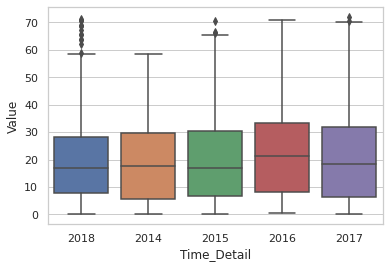

In [269]:
country_dict = dict()

In [270]:
all_counties = list(set(goal4_focus["GeoAreaName"]))
all_skills = list(set(goal4_focus["Type of skill"]))
for country in all_counties:
    country_dict[country] = dict()
    temp = goal4_focus[goal4_focus["GeoAreaName"] == country]
    available_skills = list(set(temp ["Type of skill"]))
    for skill in available_skills:
        
        temp2 = temp[temp["Type of skill"] == skill]
        country_dict[country][skill] = np.mean(temp2["Value"])
        
        
    

In [271]:
test_summary = pd.DataFrame.from_dict(country_dict)


In [187]:

test0 = pd.DataFrame(mask.sum(axis=0))
test01 = test0.transpose()
test01.index  = ["missing"]

In [188]:
test2 = test_summary.append(test01)


In [197]:
test2 = test2.sort_values(by = 'missing',axis=1,ascending = False)

In [198]:
test3 = test2.iloc[0:9]

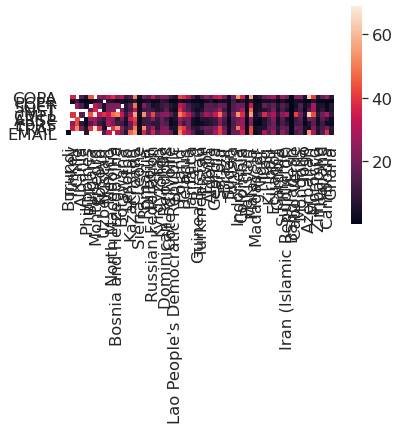

In [224]:
sns.set(font_scale=1.5)
mask= test3.isnull()
ax = sns.heatmap(test3,mask=mask, square=True,xticklabels=True, yticklabels=True)
ax.set_facecolor('xkcd:white')
#ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 4)
#ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 3)





['Burundi',
 'Turkey',
 'Chile',
 'Albania',
 'Philippines',
 'Bulgaria',
 'Montenegro',
 'Kosovo',
 'Uzbekistan',
 'Mexico',
 'North Macedonia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Lesotho',
 'Kazakhstan',
 'Croatia',
 'Sierra Leone',
 'Romania',
 'Djibouti',
 'Russian Federation',
 'Kyrgyzstan',
 'Tonga',
 'Dominican Republic',
 "Côte d'Ivoire",
 "Lao People's Democratic Republic",
 'Poland',
 'Belarus',
 'Peru',
 'Jamaica',
 'Guinea-Bissau',
 'Turkmenistan',
 'Egypt',
 'Algeria',
 'Georgia',
 'Serbia',
 'Brazil',
 'Sudan',
 'Tunisia',
 'Indonesia',
 'Colombia',
 'Pakistan',
 'Malaysia',
 'Madagascar',
 'Niger',
 'Iraq',
 'Kiribati',
 'Ecuador',
 'Gambia',
 'Suriname',
 'Iran (Islamic Republic of)',
 'Bangladesh',
 'Cabo Verde',
 'Mongolia',
 'Togo',
 'Azerbaijan',
 'Morocco',
 'Zimbabwe',
 'Thailand',
 'Cambodia',
 'Ghana']

In [223]:
ax.figure.savefig("output.pdf")

In [240]:

correlation_dict = dict()

all_counties = list(set(goal4_focus["GeoAreaName"]))
all_skills = list(set(goal4_focus["Type of skill"]))
for country in all_counties:
    #temp_dict = dict()
    temp = goal4_focus[goal4_focus["GeoAreaName"] == country]
    available_skills = list(set(temp ["Type of skill"]))
    
    for country2 in all_counties:
        if country != country2:
            temp2 = goal4_focus[goal4_focus["GeoAreaName"] == country2]
            available_skills2 = list(set(temp2 ["Type of skill"]))

            shared_skills = set(available_skills2).intersection(set(available_skills))
            #print(shared_skills)

            for skill in available_skills:
                if skill not in correlation_dict:
                    correlation_dict[skill] = dict()
                    
                #print(skill)
                skill1 = temp[temp["Type of skill"] == skill]["Value"]
                skill2 = temp2[temp2["Type of skill"] == skill]["Value"]
                
                if len(skill1) > 1 and len(skill2) > 1:
                    correlation,pvalue = scipy.stats.pearsonr(skill1, skill1) 

                    if country not in correlation_dict[skill].keys():
                        correlation_dict[skill][country] = dict()

                    correlation_dict[skill][country][country2] = correlation



    
    
        
        
    

In [382]:
goal4_focus = goal4_focus.sort_values(by= "Time_Detail")

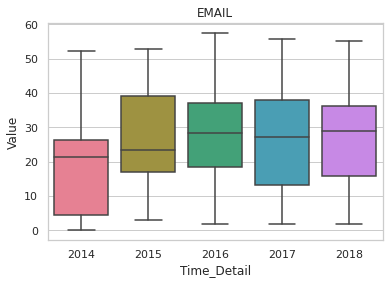

In [384]:
import seaborn as sns
sns.set_theme(style="whitegrid")

for skill in all_skills:
    plt.clf()
    goal4_focus_test = goal4_focus[goal4_focus["Type of skill"] == skill]
    ax = sns.boxplot(x="Time_Detail", y="Value", data=goal4_focus_test,palette = "husl")
    ax.set_title(skill)

    ax.figure.savefig("boxplots_time" + skill  + ".png")
    

In [420]:
missing_countries = list((test2.iloc[9] > 3).index)

non_missing_countries = [c for c in all_counties if c not in missing_countries]
#goal4_focus[goal4_focus['GeoAreaName'] not in missing_countries]

In [426]:
sum(goal4_focus['GeoAreaName'].isin(missing_countries))

2215

In [424]:
goal4_focus[goal4_focus['GeoAreaName'].isin(missing_countries)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [421]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset("dietox", "geepack").data

md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])

[]

In [407]:
[c for c in all_counties if c not in missing_countries]

[]

In [237]:
pd.DataFrame.from_dict(correlation_dict['COPA'])

,Georgia,Cambodia,Kosovo,Tunisia,Indonesia,Albania,Colombia,Pakistan,Malaysia,Madagascar,...,Côte d'Ivoire,Lao People's Democratic Republic,Tonga,Belarus,Peru,Jamaica,Bulgaria,Guinea-Bissau,Egypt,Botswana
Cambodia,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Kosovo,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Sudan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Tunisia,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Indonesia,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Albania,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Colombia,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Pakistan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Malaysia,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Madagascar,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
corr=test3.corr()
sns.set(font_scale=1.5)
mask= test3.isnull()
ax = sns.heatmap(test3,mask=mask, square=True,xticklabels=True, yticklabels=True)
ax.set_facecolor('xkcd:white')
#ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 4)
#ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 3)



In [105]:
goal4_focus.groupby(["Time_Detail", "Type of skill"]).size()

Time_Detail  Type of skill
2014         ARSP             36
             CMFL             34
             COPA             35
             EMAIL            22
             EPRS             38
                              ..
2019         EPRS             75
             INST             49
             PCPR             61
             SOFT             65
             TRAF             71
Length: 72, dtype: int64

In [305]:
time

'2017'

In [310]:
goal4_focus_temp.shape

(583, 8)

In [311]:
#IMPUTATION


country_dict_year = dict()

all_counties = list(set(goal4_focus["GeoAreaName"]))
all_skills = list(set(goal4_focus["Type of skill"]))
all_times = list(set(goal4_focus["Time_Detail"])) 
all_times = [t for t in all_times if t != '2018-19' ]

for time in all_times:
    goal4_focus_temp = goal4_focus[goal4_focus["Time_Detail"] == time]
    #print(goal4_focus_temp.shape())
    country_dict_year[time] = dict()
    for country in all_counties:
        country_dict_year[time][country] = dict()
        temp = goal4_focus_temp[goal4_focus_temp["GeoAreaName"] == country]
        available_skills = list(set(temp ["Type of skill"]))
        for skill in available_skills:

            temp2 = temp[temp["Type of skill"] == skill]
            country_dict_year[time][country][skill] = np.mean(temp2["Value"])


    

In [317]:
country_dict_year_correlations = dict()


for time in all_times:
    year_corr = pd.DataFrame.from_dict(country_dict_year[time])
    country_dict_year_correlations[time] = year_corr.corr()
    

In [369]:
country_line = country_dict_year_correlations['2017']["Cambodia"]
country_line  =[ c for c in country_line if c != 1.0]


<function list.index(value, start=0, stop=9223372036854775807, /)>

[0.8684869114871907,
 0.7645322506689534,
 nan,
 0.737678183432575,
 0.6401806782398624,
 0.7942438630847484,
 nan,
 0.6526103705305626,
 nan,
 0.791459339243139,
 0.7168059869194042,
 0.7214759273948624,
 0.7797797207043369,
 nan,
 nan,
 nan,
 nan,
 0.690635633369174,
 0.8678045715299335,
 nan,
 nan,
 0.7960411334213996,
 0.8226622733585738,
 0.5550876727884412,
 nan,
 nan,
 0.6103539263793349,
 nan,
 0.8353283404697645,
 0.9330376678041622,
 0.9212049419329191,
 nan,
 0.6248480627652873,
 nan,
 nan,
 nan,
 0.7388596059404968,
 0.735674305785048,
 0.7051050693955406,
 0.9044389684423008,
 0.5304609608162376,
 nan,
 0.8409248775209165,
 0.560121756877349,
 0.853608246950331,
 nan,
 nan,
 0.9483204477627664,
 0.9586534416307101,
 nan,
 nan,
 0.7805481434040935,
 nan,
 nan]

In [355]:

for country in all_counties:
    for time in all_times:
    
        goal4_focus_temp =goal4_focus[goal4_focus["GeoAreaName"] == country]
        goal4_focus_temp = goal4_focus_temp[goal4_focus_temp["Time_Detail"] == time]
        
        
    
    
        for skill in all_skills:
            #print(skill)
            if skill not in list(goal4_focus_temp['Type of skill']):
                print("missing" + country + skill +time)
                most_similar_country = 
                #print("most_similar_country" + str(most_similar_country))

missingGeorgiaCOPA2017-18
missingGeorgiaSOFT2017-18
missingGeorgiaPCPR2017-18
missingGeorgiaINST2017-18
missingGeorgiaCMFL2017-18
missingGeorgiaARSP2017-18
missingGeorgiaEPRS2017-18
missingGeorgiaTRAF2017-18
missingGeorgiaEMAIL2017-18
missingGeorgiaCOPA2015
missingGeorgiaSOFT2015
missingGeorgiaPCPR2015
missingGeorgiaINST2015
missingGeorgiaCMFL2015
missingGeorgiaARSP2015
missingGeorgiaEPRS2015
missingGeorgiaTRAF2015
missingGeorgiaEMAIL2015
missingGeorgiaCOPA2014
missingGeorgiaSOFT2014
missingGeorgiaPCPR2014
missingGeorgiaINST2014
missingGeorgiaCMFL2014
missingGeorgiaARSP2014
missingGeorgiaEPRS2014
missingGeorgiaTRAF2014
missingGeorgiaEMAIL2014
missingCambodiaCOPA2017-18
missingCambodiaSOFT2017-18
missingCambodiaPCPR2017-18
missingCambodiaINST2017-18
missingCambodiaCMFL2017-18
missingCambodiaARSP2017-18
missingCambodiaEPRS2017-18
missingCambodiaTRAF2017-18
missingCambodiaEMAIL2017-18
missingCambodiaCOPA2016
missingCambodiaSOFT2016
missingCambodiaPCPR2016
missingCambodiaINST2016
missingCa

In [322]:
list(goal4_focus_temp['Type of skill'])

['ARSP',
 'EMAIL',
 'SOFT',
 'EPRS',
 'TRAF',
 'INST',
 'PCPR',
 'CMFL',
 'COPA',
 'INST',
 'CMFL',
 'CMFL',
 'INST',
 'PCPR',
 'PCPR',
 'EMAIL',
 'EPRS',
 'COPA',
 'EPRS',
 'COPA',
 'ARSP',
 'INST',
 'TRAF',
 'ARSP',
 'CMFL',
 'EMAIL',
 'COPA',
 'EMAIL',
 'PCPR',
 'EPRS',
 'TRAF',
 'TRAF',
 'ARSP',
 'EMAIL',
 'INST',
 'TRAF',
 'EPRS',
 'COPA',
 'INST',
 'CMFL',
 'ARSP',
 'CMFL',
 'PCPR',
 'SOFT',
 'COPA',
 'SOFT',
 'EMAIL',
 'ARSP',
 'SOFT',
 'COPA',
 'EMAIL',
 'CMFL',
 'INST',
 'EPRS',
 'EPRS',
 'TRAF',
 'TRAF',
 'ARSP',
 'PCPR',
 'PCPR',
 'PCPR',
 'CMFL',
 'CMFL',
 'CMFL',
 'INST',
 'INST',
 'COPA',
 'ARSP',
 'PCPR',
 'EPRS',
 'EPRS',
 'COPA',
 'INST',
 'TRAF',
 'ARSP',
 'COPA',
 'PCPR',
 'EPRS',
 'ARSP',
 'TRAF',
 'TRAF',
 'EMAIL',
 'INST',
 'TRAF',
 'ARSP',
 'COPA',
 'PCPR',
 'TRAF',
 'TRAF',
 'CMFL',
 'PCPR',
 'ARSP',
 'EPRS',
 'PCPR',
 'EPRS',
 'EPRS',
 'COPA',
 'INST',
 'CMFL',
 'INST',
 'COPA',
 'ARSP',
 'CMFL',
 'EMAIL',
 'SOFT',
 'PCPR',
 'CMFL',
 'TRAF',
 'EPRS',
 'ARSP',
 

In [ ]:
skill

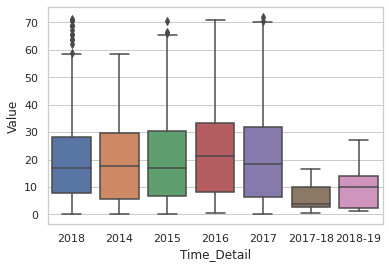

Time_Detail  Type of skill
2014         ARSP             36
             CMFL             34
             COPA             35
             EMAIL            22
             EPRS             38
                              ..
2019         EPRS             75
             INST             49
             PCPR             61
             SOFT             65
             TRAF             71
Length: 72, dtype: int64

<AxesSubplot:>

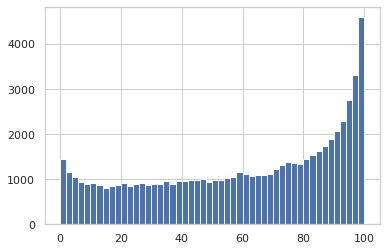

In [38]:
goal4_focus["Value"].hist(bins=50)

<AxesSubplot:>

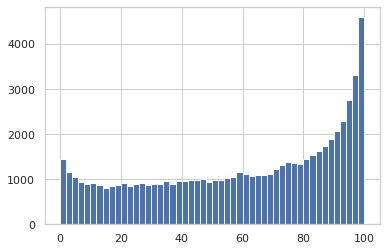

In [37]:
goal4_focus_notmissing["Value"].hist(bins=50)